In [1]:
import os
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import math

# Data前處理

In [2]:
label = []
with open('./dataset/data_T.csv', newline='') as data_t:
    Data_t= csv.reader(data_t)
    for i in Data_t:
        label.append(i[1])
label_t = label[1:]
label = []
for i in label_t:
    i = float(i)
    label.append(i)

In [3]:
feature = []
with open('./dataset/data_X.csv', newline='') as data_x:
    Data_x= csv.reader(data_x)
    for i in Data_x:
        feature.append(i[1:])
feature=feature[1:]

In [4]:
#normalize : (now - min) / (max - min)
def normalize(data):
    result = []
    data = np.array(data)
    data = data.T
    for i in range(len(data)):  #0~7 
        temp = []
        for j in range(len(data[0])): #0~500 
            max_value = max(data[i])
            min_value = min(data[i])
            now = data[i][j]
            n = (float(now) - float(min_value))/(float(max_value)-float(min_value))
            temp.append(n)
        result.append(temp)
    result = np.array(result)
    result = result.T
    return result 

In [5]:
# error function: E = (1/2N) * sum (y^ - label)^2
def evaluate(weight,x,y,N):
    y_pred = np.dot(x,weight)
    a = (y_pred-y)
    aa = np.dot(a,a.T)
    E = aa.sum()/(2*N)
    #E = math.sqrt(E)
    return E

In [6]:
feature = normalize(feature)

In [7]:
# Train Test Split
x_train = feature[0:400]
y_train = label[0:400]
x_test = feature[400:500]
y_test = label[400:500]

# 1.最小平方法 

In [8]:
# weight = (feature.T * feature)^-1 * (feature.T) * label
tt = np.dot(x_train.T,x_train)
tt_inv = np.linalg.inv(tt)
temp=np.dot(tt_inv,x_train.T)
wei=np.dot(temp,y_train)
print(wei)

[ 0.29230842  0.0137733  -0.05902343  0.05914578  0.21701888  0.8953103
 -0.00856216]


In [39]:
E_test_1 = evaluate(weight = wei,x= x_test,y = y_test,N = 100)
E_train_1 = evaluate(weight = wei,x = x_train,y = y_train,N = 400)
print('Train data error（最小平方法）: ',E_train_1)
print('Test data error（最小平方法）: ',E_test_1)

Train data error（最小平方法）:  0.005769616614109674
Test data error（最小平方法）:  0.006357443043549527


# 2. Gradient Descent (M=1)

In [40]:
#隨機w（w0）
w0 = []
random.seed(1234)#固定這組隨機的w0，以嘗試變數
for i in range(7):
    w0.append(random.random())

In [41]:
#變數
epoch = 5000
lr = 0.00002
E_train_2 = []

In [42]:
def training(w0,epoch,lr):
    weight = w0
    for i in range(epoch):
        temp1 = (np.dot(weight,x_train.T) - y_train)
        temp2 = np.dot(x_train.T,temp1)
        dE = temp2.sum() / 400
        weight = weight - (lr * dE)
        
        temp3 = evaluate(weight,x_train,y_train,N = 400)
        E_train_2.append(temp3)
    
    
    plt.plot(range(epoch), E_train_2)#list
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('RMS')
    plt.show()
    return weight

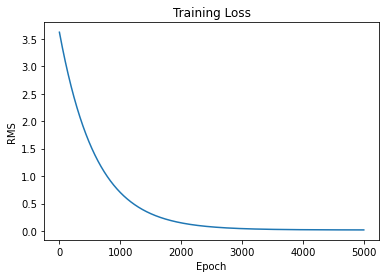

Train data error（Gradient Descent）:  0.021213591981805103


In [43]:
weight = training(w0,epoch,lr)
print('Train data error（Gradient Descent）: ',E_train_2[-1]) #-1：最後一個

In [44]:
E_test_2 = evaluate(weight,x_test,y_test,N = 100)
print('Test data error（Gradient Descent）: ',E_test_2)

Test data error（Gradient Descent）:  0.019095898928681337
